# Árvores II - Tarefa I

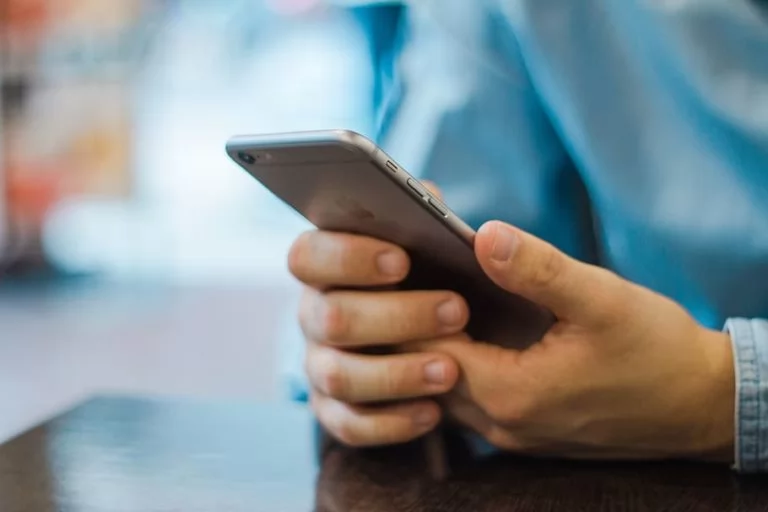  
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
features = pd.read_csv(r"C:\Users\harle\Data-science\uci-har-dataset\uci-har-dataset/features.txt",sep=" ")
features.head()

,1,tBodyAcc-mean()-X
0,2,tBodyAcc-mean()-Y
1,3,tBodyAcc-mean()-Z
2,4,tBodyAcc-std()-X
3,5,tBodyAcc-std()-Y
4,6,tBodyAcc-std()-Z


In [4]:
subject_train = pd.read_csv(r"C:\Users\harle\Data-science\uci-har-dataset\uci-har-dataset\train/subject_train.txt", sep =" ")
subject_train = subject_train.squeeze()
subject_train.head()

0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64

In [5]:
X_train = pd.read_csv(r"C:\Users\harle\Data-science\uci-har-dataset\uci-har-dataset\train/X_train.txt", delim_whitespace=True, header=None)
X_train.rename(columns=features, inplace=True)

X_train.head()

TypeError: 'DataFrame' object is not callable

In [6]:
features.head()

,1,tBodyAcc-mean()-X
0,2,tBodyAcc-mean()-Y
1,3,tBodyAcc-mean()-Z
2,4,tBodyAcc-std()-X
3,5,tBodyAcc-std()-Y
4,6,tBodyAcc-std()-Z


In [7]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [98]:
%%time


UsageError: %%time is a cell magic, but the cell body is empty. Did you mean the line magic %time (single %)?


### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [99]:
%%time


UsageError: %%time is a cell magic, but the cell body is empty. Did you mean the line magic %time (single %)?
